# Import Libraries

In [1]:
# Import required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)


# To ignore warnings

import warnings
warnings.filterwarnings("ignore")

# Loading and reading the dataset

In [2]:
# Reading the csv file and nameing the DataFrame.

df = pd.read_csv('../data/weather-sa-2017-2019-clean.csv')

In [3]:
#view the datset
df

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249018,2848,Jawf,30 April 2019,19:00,2019,4,30,19,0,Passing clouds,32,19,14%,1014.0,-1
249019,2849,Jawf,30 April 2019,20:00,2019,4,30,20,0,Passing clouds,29,9,22%,1015.0,-1
249020,2850,Jawf,30 April 2019,21:00,2019,4,30,21,0,Passing clouds,27,7,24%,1016.0,-1
249021,2851,Jawf,30 April 2019,22:00,2019,4,30,22,0,Clear,26,0,26%,1017.0,16


In [4]:
# Check How many rows and columns in the data set
df.shape

(249023, 15)

In [5]:
# Explore the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


# Cleaning and Data Preprocessing

In [6]:
# Checking for duplicated rows

print("Number of duplicate rows: ", sum(df.duplicated()))


Number of duplicate rows:  0


In [7]:
# Dropping irrelevant columns

df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [8]:
# Check for missing values

df.isnull().sum()

city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

In [9]:
# Filling missing values with forward and backward filling
df = df.fillna(method='ffill').fillna(method='bfill')

In [10]:
# Remove the (%) form the 'humidity' column, then Divide values by 100
# Then, Convert the 'humidity' column to int

df['humidity'] = df['humidity'].str.replace('%',' ')
df['humidity'] = df['humidity'].astype('float')/100
df.head()


,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,0.64,1018.0,16
1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,0.64,1018.0,16
2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,0.72,1019.0,16
3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,0.72,1019.0,16
4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,0.72,1019.0,16


In [11]:
# Summary Statistics
df.describe()

,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000
mean,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,0.375527,1015.452557,11.053453
std,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,0.235929,6.973451,7.053005
min,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,0.000000,904.000000,-1.000000
25%,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,0.170000,1011.000000,5.000000
50%,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,0.320000,1016.000000,16.000000
75%,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,0.550000,1021.000000,16.000000
max,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,1.000000,1101.000000,161.000000


In [12]:
# Categorical Summary Statistics
df.describe(exclude="number")

,city,date,time,weather
count,249023,249023,249023,249023
unique,13,850,710,81
top,Jawf,24 November 2018,07:00,Clear
freq,20352,321,10415,98827


In [13]:
# summary statistics of the temprature degree for each city
df.groupby(['city'])['temp'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Assir,13488.0,20.257414,5.668614,3.0,16.0,20.0,24.0,35.0
Baha,19959.0,23.468110,6.775876,4.0,18.0,24.0,29.0,39.0
EP,18505.0,27.215077,8.936535,3.0,20.0,27.0,34.0,50.0
Hail,20121.0,25.927837,10.083176,-2.0,18.0,25.0,34.0,48.0
Jawf,20352.0,23.101268,10.229671,-4.0,15.0,23.0,31.0,46.0
Jazan,19829.0,20.711735,5.855156,3.0,16.0,21.0,25.0,37.0
Madina,19965.0,28.708740,8.336009,6.0,22.0,29.0,35.0,47.0
Mecca,20268.0,29.023239,4.607044,16.0,26.0,29.0,32.0,49.0
Najran,19847.0,20.692951,5.863598,2.0,16.0,21.0,25.0,37.0


In [14]:
# Renameing EP to Eastren Province
df["city"].replace({"EP": "Eastern Province"}, inplace=True)
df['city'].unique()

array(['Qassim', 'Hail', 'Madina', 'Eastern Province', 'Riyadh', 'Mecca',
       'Tabuk', 'Assir', 'Northern boarder', 'Jazan', 'Najran', 'Baha',
       'Jawf'], dtype=object)

<AxesSubplot:>

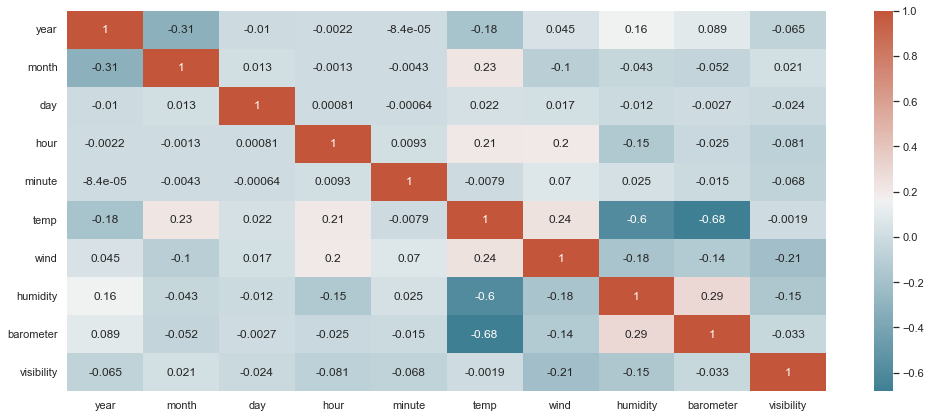

In [15]:
# calculate correlation matrix
corr = df.corr() # plot the heatmap
plt.figure(figsize=(17,7))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:>

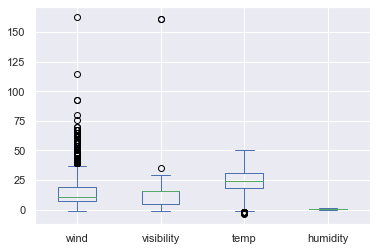

In [16]:
# Creating box plot to check for extreme value

df[['wind', 'visibility', 'temp', 'humidity']].plot(kind='box')

In [17]:
# Derecting outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year           1.00
month          6.00
day           15.00
hour          12.00
minute         0.00
temp          13.00
wind          12.00
humidity       0.38
barometer     10.00
visibility    11.00
dtype: float64


In [18]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(244644, 14)

<AxesSubplot:>

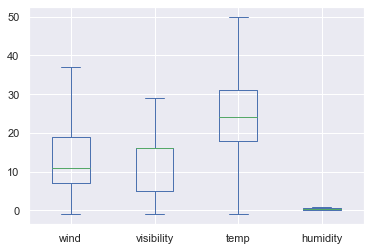

In [19]:
# Creating box plot to check for extreme value

df[['wind', 'visibility', 'temp', 'humidity']].plot(kind='box')

In [20]:
# using groupby function with aggregation to get mean, min and max values for temprature per city
result = df.groupby('city').agg({'temp': ['mean', 'min', 'max']}).astype(int)
  
result

temp        
                 mean min max
city                         
Assir              20   3  35
Baha               23   4  39
Eastern Province   26   3  50
Hail               25  -1  48
Jawf               23  -1  46
Jazan              20   3  37
Madina             28   6  47
Mecca              29  16  49
Najran             20   2  37
Northern boarder   25  -1  47
Qassim             25  -1  48
Riyadh             27   2  47
Tabuk              22  -1  45

# Data Visualization

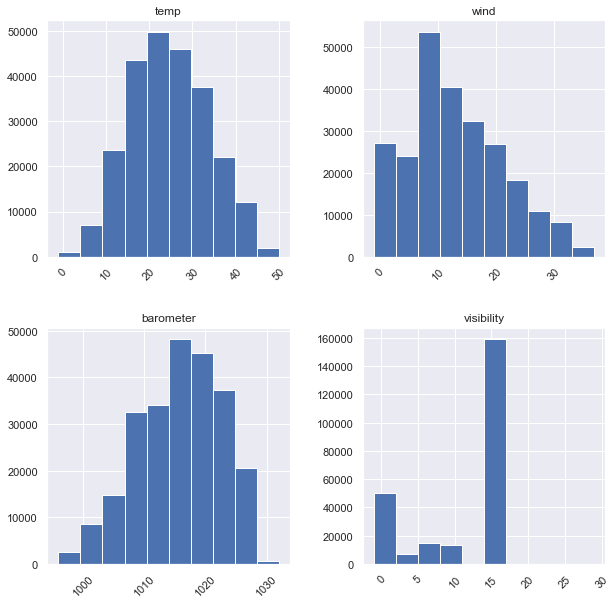

In [21]:
# Plot each numirical feature in a historgram

df.hist(figsize=(10,10), column =[ 'temp', 'wind', 'barometer', 'visibility'], xrot=45)
plt.show()

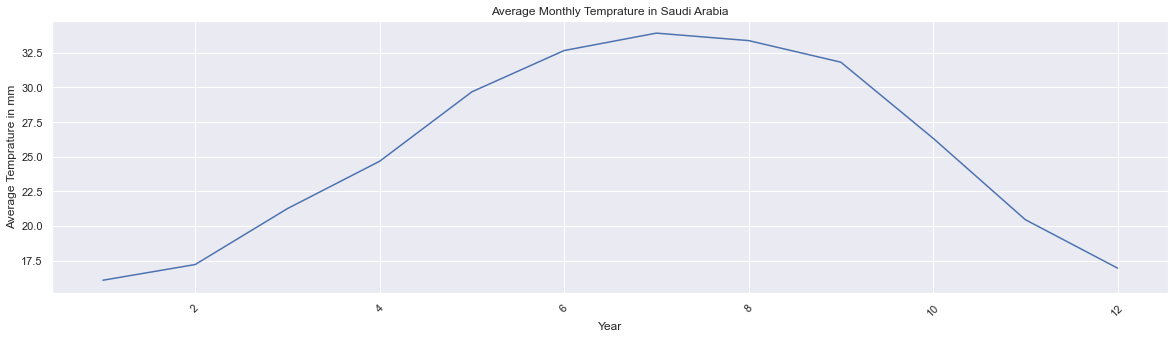

In [22]:
plt.figure(figsize = [20,5]) #[width, height]
df.groupby(['month'])['temp'].mean().plot()
plt.title( 'Average Monthly Temprature in Saudi Arabia')
plt.ylabel('Average Temprature in mm')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'City')

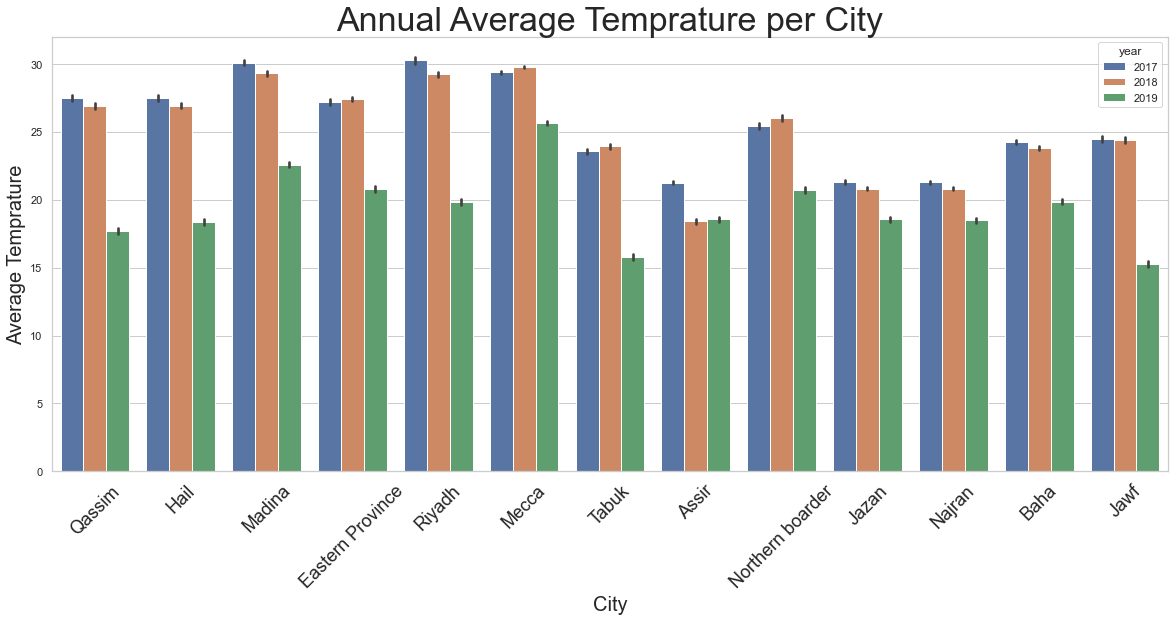

In [23]:
sns.set_style('whitegrid')
plt.subplots(figsize=(20,8))
plt.title("Annual Average Temprature per City", fontsize=34)
sns.barplot(x="city", y="temp", hue='year', data=df)
plt.xticks(rotation = 45)
plt.xticks(fontsize=18)
plt.ylabel("Average Temprature",fontsize=20)
plt.xlabel("City",fontsize=20)

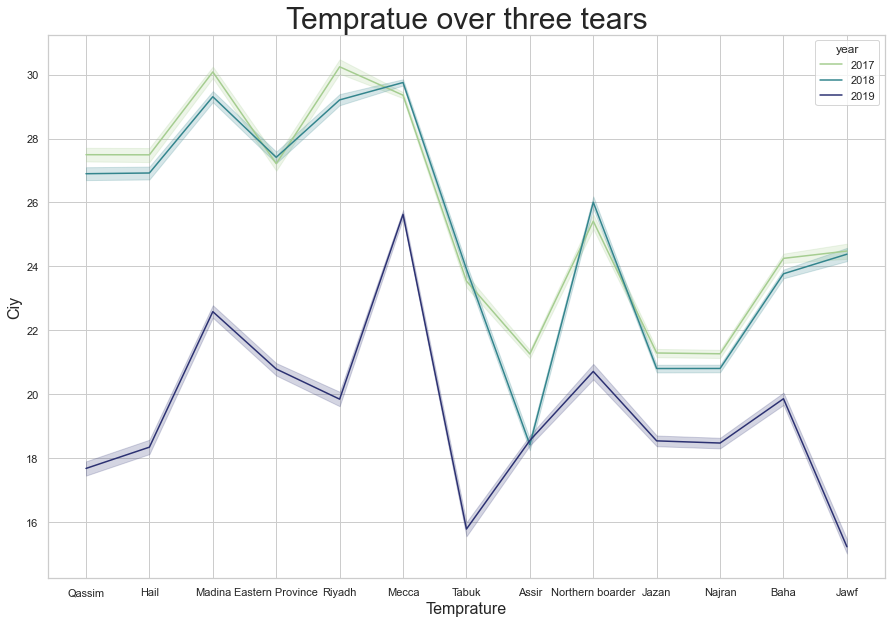

In [84]:
plt.figure(figsize=(15,10))
sns.lineplot(x='city', y='temp', hue = 'year', data=df, palette='crest', sizes=(2.5,2.5))
plt.title('Tempratue over three tears', fontsize=30)
plt.ylabel('Ciy', fontsize=16)
plt.xlabel('Temprature', fontsize=16)
plt.show()

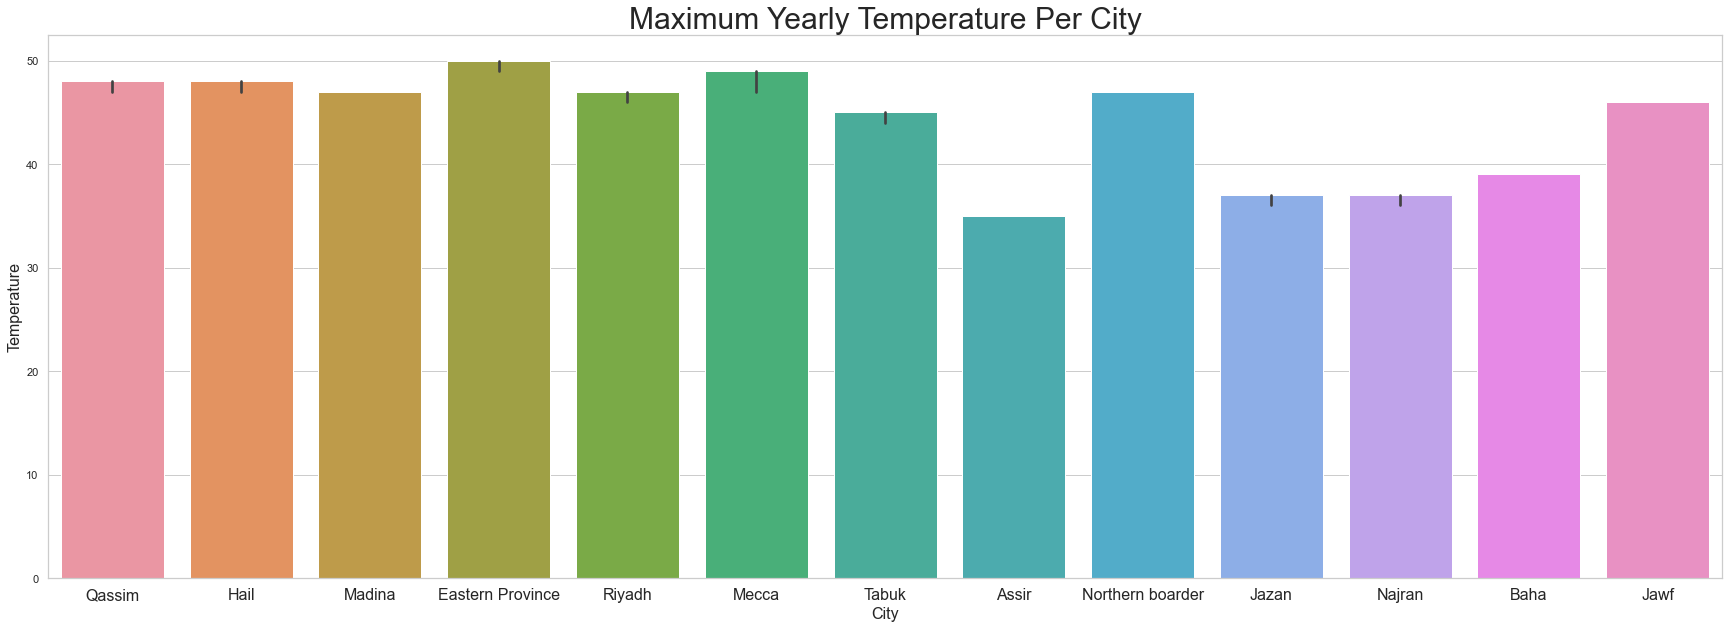

In [24]:
plt.figure(figsize=[30,10])
plt.title('Maximum Yearly Temperature Per City', fontsize=30)
sns.barplot(data=df, x='city', y='temp', estimator=np.max)
plt.ylabel('Temperature', fontsize=16)
plt.xlabel('City', fontsize=16)
plt.xticks(fontsize=16)
plt.show()

# - Model Building: training and testing

In [21]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [22]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [23]:
# OrdinalEncoder is for encode categorical features as an integer array 
# Create our Ordinal Encoder object
ordinal = OrdinalEncoder()

# The categorical features
columns_to_enc = ['year', 'month', 'day', 'hour']

# Ordinal encode the columns
ordinal_train = ordinal.fit_transform(train[columns_to_enc])
ordinal_test = ordinal.transform(test[columns_to_enc])

# Convert ordinal_train and ordinal_test to a dataframes
train_ordinal = pd.DataFrame(ordinal_train, columns = columns_to_enc)
test_ordinal = pd.DataFrame(ordinal_test, columns = columns_to_enc)

In [25]:
# StandardScaler is for standardize features by removing the mean and scaling to unit variance
# Create our Standard Scaler object
scaler = StandardScaler()

# Features that need to Scale
columns_to_scale = ['temp', 'wind', 'humidity', 'barometer', 'visibility']

# Standard Scaling the columns
scaled_train = scaler.fit_transform(train[columns_to_scale])
scaled_test = scaler.transform(test[columns_to_scale])

# Convert scaled_train and scaled_test to a dataframes
train_scaled = pd.DataFrame(scaled_train, columns = columns_to_scale)
test_scaled = pd.DataFrame(scaled_test, columns = columns_to_scale)

In [26]:
# OneHotEncoder is for encode categorical features as a one-hot numeric array
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

# Features that need to One Hot encode
columns_to_onehot = ['city']

# One Hot encode the columns
one_hot_train = one_hot.fit_transform(train[columns_to_onehot]).toarray()
one_hot_test = one_hot.transform(test[columns_to_onehot]).toarray()

# The new column names after One Hot encode
column_names = ['city_Baha', 'city_Hail', 'city_Jawf', 'city_Jazan', 'city_Madina', 'city_Mecca', 'city_Najran',
                'city_Northern boarder', 'city_Qassim', 'city_Tabuk', 'city_Assir', 'city_EP', 'city_Riyadh']

# Convert one_hot_train and one_hot_test to a dataframes
train_one_hot = pd.DataFrame(one_hot_train, columns = column_names)
test_one_hot = pd.DataFrame(one_hot_test, columns = column_names)

In [27]:
# Add a new column to all these dataset which is there index
# To be able to merge these dataframes
train_ordinal['index'] = train_ordinal.index
test_ordinal['index'] = test_ordinal.index
train_scaled['index'] = train_scaled.index
test_scaled['index'] = test_scaled.index
train_one_hot['index'] = train_one_hot.index
test_one_hot['index'] = test_one_hot.index

In [31]:
trains = [train_ordinal, train_scaled, train_one_hot] # all train dataframes that we have created
tests  = [test_ordinal, test_scaled, test_one_hot]    # all test dataframes that we have created

# merage all the train and together by 'index' column, then merage the test dataframes
train = reduce(lambda left,right: pd.merge(left,right,on='index'), trains) 
test = reduce(lambda left,right: pd.merge(left,right,on='index'), tests)

In [41]:
# Split training and testing into features and target to predict 'temp' column
target = "temp" # The column that we will predict

X_train = train.drop(target, axis=1) # features
y_train = train[target] # target

X_test = test.drop(target, axis=1) # features
y_test = test[target] # target

In [43]:
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

reg_pred_train = reg_linear.predict(X_train)
reg_pred_test = reg_linear.predict(X_test)

In [44]:
reg_linear.score(X_test, y_test)

0.7751578563762214

In [46]:
print ("Training MAE", mean_absolute_error(y_train, reg_pred_train))
print ("Testing MAE", mean_absolute_error(y_test, reg_pred_test))

Training MAE 0.37378963514408653
Testing MAE 0.3756394966077021


In [50]:
print ("Training MAE", mean_absolute_error(y_train, reg_pred_train))
print ("Testing MAE", mean_absolute_error(y_test, reg_pred_test))

print ("Training MSE", metrics.mean_squared_error(y_train, reg_pred_train))
print ("Testing MSE", metrics.mean_squared_error(y_test, reg_pred_test))

print ("Training R2", metrics.r2_score(y_train, reg_pred_train))
print ("Testing R2", metrics.r2_score(y_test, reg_pred_test))


Training MAE 0.37378963514408653
Testing MAE 0.3756394966077021
Training MSE 0.22468515912932027
Testing MSE 0.22674850094541604
Training R2 0.7753148408706797
Testing R2 0.7751578563762214


In [52]:
# X = np.array([2040]).reshape(-1,1)
# X

array([[2040]])

# Data Modelding

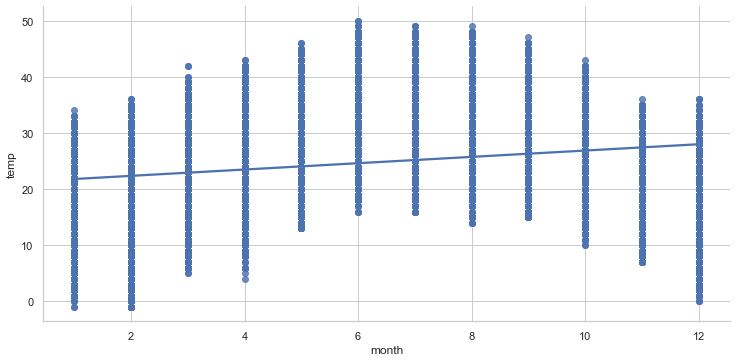

In [25]:
# Plot Regression Line

sns.lmplot(x = "month", y = "temp", data = df, height = 5.2, aspect = 2);

In [64]:
# Import required libraries for Machine Learning

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from functools import reduce

In [66]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [67]:
# OrdinalEncoder is for encode categorical features as an integer array 
# Create our Ordinal Encoder object
ordinal = OrdinalEncoder()

# The categorical features
columns_to_enc = ['year', 'month', 'day', 'hour']

# Ordinal encode the columns
ordinal_train = ordinal.fit_transform(train[columns_to_enc])
ordinal_test = ordinal.transform(test[columns_to_enc])

# Convert ordinal_train and ordinal_test to a dataframes
train_ordinal = pd.DataFrame(ordinal_train, columns = columns_to_enc)
test_ordinal = pd.DataFrame(ordinal_test, columns = columns_to_enc)

In [68]:
# Scale features: center your data around 0. by removing the mean and scaling to unit variance

# Create our Standard Scaler object
scaler = StandardScaler()

# Features that need to Scale
columns_to_scale = ['temp', 'wind', 'humidity', 'barometer', 'visibility']

# Standard Scaling the columns
scaled_train = scaler.fit_transform(train[columns_to_scale])
scaled_test = scaler.transform(test[columns_to_scale])

# Convert scaled_train and scaled_test to a dataframes
train_scaled = pd.DataFrame(scaled_train, columns = columns_to_scale)
test_scaled = pd.DataFrame(scaled_test, columns = columns_to_scale)

In [69]:
# OneHotEncoder is for encode categorical features as a one-hot numeric array
# Create our One Hot Encoder object

one_hot = OneHotEncoder()

# Features that need to One Hot encode
columns_to_onehot = ['city']

# One Hot encode the columns
one_hot_train = one_hot.fit_transform(train[columns_to_onehot]).toarray()
one_hot_test = one_hot.fit_transform(test[columns_to_onehot]).toarray()

# The new column names after One Hot encode
column_names = ['Qassim', 'Hail', 'Madina', 'Eastren Province', 'Riyadh', 'Mecca', 'Tabuk', 'Assir', 'Northern boarder', 'Jazan', 'Najran', 'Baha', 'Jawf']

# Convert one_hot_train and one_hot_test to a dataframes
train_one_hot = pd.DataFrame(one_hot_train, columns = column_names)
test_one_hot = pd.DataFrame(one_hot_test, columns = column_names)



In [70]:
# Add a new column to all these dataset which is there index
# To be able to merge these dataframes
train_ordinal['index'] = train_ordinal.index
test_ordinal['index'] = test_ordinal.index
train_scaled['index'] = train_scaled.index
test_scaled['index'] = test_scaled.index
train_one_hot['index'] = train_one_hot.index
test_one_hot['index'] = test_one_hot.index

In [71]:
trains = [train_ordinal, train_scaled, train_one_hot] # all train dataframes that we have created
tests  = [test_ordinal, test_scaled, test_one_hot]    # all test dataframes that we have created

# merage all the train and together by 'index' column, then merage the test dataframes
train = reduce(lambda left,right: pd.merge(left,right,on='index'), trains) 
test = reduce(lambda left,right: pd.merge(left,right,on='index'), tests)

In [72]:
# Split training and testing into features and target to predict 'temp' column
target = "temp" # The column that we will predict

X_train_temp = train.drop(target, axis=1) # features
y_train_temp = train[target] # target

X_test_temp = test.drop(target, axis=1) # features
y_test_temp = test[target] # target

In [74]:
# Define the model
reg_forest = RandomForestRegressor(random_state = 42, criterion = 'mse')
reg_forest.fit(X_train_temp, y_train_temp) # fit the model

# preds_forest_train = reg_forest.predict(X_train_temp) # pred ict the temperature in train dataset
# preds_forest_test = reg_forest.predict(X_test_temp)   # predict the temperature in test dataset



RandomForestRegressor(random_state=42)

In [75]:
preds_forest_train = reg_forest.predict(X_train_temp) # predict the temperature in train dataset
preds_forest_test = reg_forest.predict(X_test_temp)

In [76]:
X = np.array([2025]).reshape(-1,1)
X

array([[2025]])

In [77]:
y_hat = reg_forest.predict(X)

print("Prediction of the temprature in 2025", y_hat)

ValueError: X has 1 features, but DecisionTreeRegressor is expecting 22 features as input.

# Model Evaluation

In [47]:
from sklearn import metrics

# evaluate the model
print ("Training MAE", mean_absolute_error(y_train_temp, preds_forest_train))
print ("Testing MAE", mean_absolute_error(y_test_temp, preds_forest_test))

print ("Training MSE", metrics.mean_squared_error(y_train_temp, preds_forest_train))
print ("Testing MSE", metrics.mean_squared_error(y_test_temp, preds_forest_test))

print ("Training R2", metrics.r2_score(y_train_temp, preds_forest_train))
print ("Testing R2", metrics.r2_score(y_test_temp, preds_forest_test))

Training MAE 0.0360106003344735
Testing MAE 0.0983384053479048
Training MSE 0.002683716090586445
Testing MSE 0.019646004826796033
Training R2 0.9973162839094135
Testing R2 0.9803790198725455


# Preciting the wind speed

In [48]:
# Split training and testing into features and target to predict 'wind' column
target = "wind" # The column that we will predict

X_train_wind = train.drop(target, axis=1) # features
y_train_wind = train[target] # target

X_test_wind = test.drop(target, axis=1) # features
y_test_wind = test[target] # target

In [49]:
# define the model
reg_forest = RandomForestRegressor(random_state = 42, criterion = 'mse')
reg_forest.fit(X_train_wind, y_train_wind) # fit the model

preds_forest_train = reg_forest.predict(X_train_wind) # predict the wind in train dataset
preds_forest_test = reg_forest.predict(X_test_wind)   # predict the wind in test dataset

# evaluate the model
print ("Training MAE", mean_absolute_error(y_train_wind, preds_forest_train))
print ("Testing MAE", mean_absolute_error(y_test_wind, preds_forest_test))

KeyboardInterrupt: 

# TO BE REMOVED

In [ ]:
# Putting feature variable to X
X = df[['wind', 'barometer', 'visibility']]

# Putting response variable to y
y = df['temp']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 99)
X_train.head()

In [ ]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

# AR example
from statsmodels.tsa.ar_model import AutoReg

# fit model
model = AutoReg(df, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(df), len(df))
print(yhat)


In [ ]:
# Importing linear regression from sklearn library
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train = df[['year', 'month', 'day', 'wind', 'barometer', 'visibility']]
y_train = df[['temp']]

model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

In [ ]:
# Let's check the evaluation metrics of our  model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn import metrics


    
# Making predictions
y_pred = model.predict(X_test)
y_pred



In [ ]:
X = np.array([2030]).reshape(-1,1)
X